In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('fifa_ranking-2019-12-19.csv', index_col = 'rank_date')

df1.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
rank_date,,,,,,,,
2019-12-19,43935,1,Belgium,BEL,1765,10706050,0,UEFA
2019-12-19,43946,2,France,FRA,1733,10703030,0,UEFA
2019-12-19,43924,3,Brazil,BRA,1712,10701020,0,CONMEBOL
2019-12-19,43942,4,England,ENG,1661,10606010,0,UEFA
2019-12-19,43930,5,Uruguay,URU,1645,10604050,0,CONMEBOL


In [4]:
df1.tail()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
rank_date,,,,,,,,
1992-12-31,43825,161,Lebanon,LBN,0,0,0,AFC
1992-12-31,43895,162,Bahamas,BAH,0,0,0,CONCACAF
1992-12-31,43828,163,Maldives,MDV,0,0,0,AFC
1992-12-31,43877,163,Rwanda,RWA,0,0,0,CAF
1992-12-31,43882,163,Somalia,SOM,0,0,0,CAF


In [5]:
df1.columns

Index(['id', 'rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation'],
      dtype='object')

In [6]:
df1.shape

(60754, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60754 entries, 2019-12-19 to 1992-12-31
Data columns (total 8 columns):
id                 60754 non-null int64
rank               60754 non-null int64
country_full       60754 non-null object
country_abrv       60754 non-null object
total_points       60754 non-null int64
previous_points    60754 non-null int64
rank_change        60754 non-null int64
confederation      60754 non-null object
dtypes: int64(5), object(3)
memory usage: 4.2+ MB


Columns to work with in df1: 'country_full', 'rank', 'total_points'

In [8]:
df1 = df1[['country_full', 'rank', 'total_points']]
df1.head

<bound method NDFrame.head of            country_full  rank  total_points
rank_date                                  
2019-12-19      Belgium     1          1765
2019-12-19       France     2          1733
2019-12-19       Brazil     3          1712
2019-12-19      England     4          1661
2019-12-19      Uruguay     5          1645
...                 ...   ...           ...
1992-12-31      Lebanon   161             0
1992-12-31      Bahamas   162             0
1992-12-31     Maldives   163             0
1992-12-31       Rwanda   163             0
1992-12-31      Somalia   163             0

[60754 rows x 3 columns]>

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60754 entries, 2019-12-19 to 1992-12-31
Data columns (total 3 columns):
country_full    60754 non-null object
rank            60754 non-null int64
total_points    60754 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


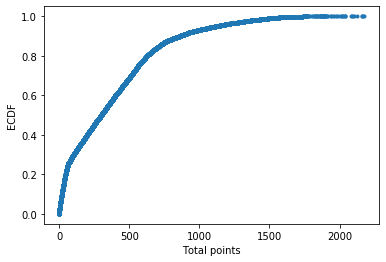

In [11]:
#Plot numerical columns to get a sense of outliers

x = np.sort(df1['total_points'])
y = np.arange(1, len(x) + 1)/ len(x)

_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Total points')
_ = plt.ylabel('ECDF')

There looks to be an outlier value (around 2000 points) in the 'total_points' column

In [15]:
#There's a peak so I sorted the total points column
#This is not showing the row(s) with the outlier value moreover I would expect 2019 ranking to be the highest value
pd.set_option('display.max_columns', 100)
df1['total_points'].sort_values(ascending = True)
df1

,country_full,rank,total_points
rank_date,,,
2019-12-19,Belgium,1,1765
2019-12-19,France,2,1733
2019-12-19,Brazil,3,1712
2019-12-19,England,4,1661
2019-12-19,Uruguay,5,1645
...,...,...,...
1992-12-31,Lebanon,161,0
1992-12-31,Bahamas,162,0
1992-12-31,Maldives,163,0


In [17]:
#Renaming 'country_full' column to 'country'
df1['country'] = df1['country_full']
df1 = df1[['rank', 'total_points', 'country']]
df1

,rank,total_points,country
rank_date,,,
2019-12-19,1,1765,Belgium
2019-12-19,2,1733,France
2019-12-19,3,1712,Brazil
2019-12-19,4,1661,England
2019-12-19,5,1645,Uruguay
...,...,...,...
1992-12-31,161,0,Lebanon
1992-12-31,162,0,Bahamas
1992-12-31,163,0,Maldives


In 2018 countries had more total points than in 2019?

In [18]:
df2 = pd.read_excel('Migrants+World+Cup+1930-2018+HARVARD.xlsx', index_col = 'FIFA World Cup')

df2

,Name Football Player,International,Date of birth,Place of birth,Country of birth,Nationality Father,Nationality Mother,Nationality Grandfather,Nationality Grandmother,Foreign-born,Contextual-Nationality
FIFA World Cup,,,,,,,,,,,
1930,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,5 May 1905,Avellaneda,Argentina,NaN,NaN,NaN,NaN,0,0
1930,Juan Botasso,Argentina,23 October 1905,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0
1930,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,23 Ferbruary 1907,Barracas,Argentina,NaN,NaN,NaN,NaN,0,0
1930,Alberto Chividini,Argentina,23 February 1907,Buenos Aires,Argentina,NaN,NaN,NaN,NaN,0,0
1930,"Attilio José Demaria (""Attilio Demaria"")",Argentina,19 March 1909,Buenos Aires,Argentina,Argentina,Argentina,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2018,M'Baye Niang,Senegal,1994-12-19 00:00:00,Meulan-en-Yvelines,France,Senegal,Senegal,NaN,NaN,1,0
2018,Keita Baldé,Senegal,8 March 1995,Arbúcies,Spain,Senegal,Senegal,NaN,NaN,1,0
2018,Lamine Gassama,Senegal,20 October 1989,Marseille,France,Senegal,Senegal,NaN,NaN,1,0


In [19]:
df2.columns

Index(['Name Football Player', 'International ', 'Date of birth',
       'Place of birth ', 'Country of birth', 'Nationality Father',
       'Nationality Mother', 'Nationality Grandfather',
       'Nationality Grandmother', 'Foreign-born', 'Contextual-Nationality'],
      dtype='object')

In [20]:
#df2 column "International" has space which is not conducive to slicing so i eliminate whitespace

df2.columns = [c.replace(' ', '') for c in df2.columns]
df2.columns

Index(['NameFootballPlayer', 'International', 'Dateofbirth', 'Placeofbirth',
       'Countryofbirth', 'NationalityFather', 'NationalityMother',
       'NationalityGrandfather', 'NationalityGrandmother', 'Foreign-born',
       'Contextual-Nationality'],
      dtype='object')

In [21]:
df2.shape

(10137, 11)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10137 entries, 1930 to 2018
Data columns (total 11 columns):
NameFootballPlayer        10137 non-null object
International             10137 non-null object
Dateofbirth               10137 non-null object
Placeofbirth              10137 non-null object
Countryofbirth            10137 non-null object
NationalityFather         1192 non-null object
NationalityMother         1131 non-null object
NationalityGrandfather    175 non-null object
NationalityGrandmother    129 non-null object
Foreign-born              10137 non-null int64
Contextual-Nationality    10137 non-null int64
dtypes: int64(2), object(9)
memory usage: 950.3+ KB


Columns to work with in df2: 'NameFootballPlayer', 'International', 'Foreign-born'

In [23]:
cols = ['NameFootballPlayer', 'International','Foreign-born' ]
df2 = df2[cols]
df2.head()

,NameFootballPlayer,International,Foreign-born
FIFA World Cup,,,
1930,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,0
1930,Juan Botasso,Argentina,0
1930,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,0
1930,Alberto Chividini,Argentina,0
1930,"Attilio José Demaria (""Attilio Demaria"")",Argentina,0


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10137 entries, 1930 to 2018
Data columns (total 3 columns):
NameFootballPlayer    10137 non-null object
International         10137 non-null object
Foreign-born          10137 non-null int64
dtypes: int64(1), object(2)
memory usage: 316.8+ KB


In [25]:
#converted 'Foreign-born' column to a bool type to show indicate whether or not a player is foreign born
df2['Foreign-born']

FIFA World Cup
1930    0
1930    0
1930    0
1930    0
1930    0
       ..
2018    1
2018    1
2018    1
2018    0
2018    0
Name: Foreign-born, Length: 10137, dtype: int64

In [26]:
df2.head()

,NameFootballPlayer,International,Foreign-born
FIFA World Cup,,,
1930,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,0
1930,Juan Botasso,Argentina,0
1930,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,0
1930,Alberto Chividini,Argentina,0
1930,"Attilio José Demaria (""Attilio Demaria"")",Argentina,0


In [27]:
#Renaming 'International' column to 'country'
df2['country'] = df2['International']
df2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NameFootballPlayer,International,Foreign-born,country
FIFA World Cup,,,,
1930,Ángel Fernando Bossio Garcilández (Ángel Bossi...,Argentina,0,Argentina
1930,Juan Botasso,Argentina,0,Argentina
1930,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",Argentina,0,Argentina
1930,Alberto Chividini,Argentina,0,Argentina
1930,"Attilio José Demaria (""Attilio Demaria"")",Argentina,0,Argentina
...,...,...,...,...
2018,M'Baye Niang,Senegal,1,Senegal
2018,Keita Baldé,Senegal,1,Senegal
2018,Lamine Gassama,Senegal,1,Senegal


In [28]:
df2 = df2[['NameFootballPlayer', 'Foreign-born', 'country']]
df2

,NameFootballPlayer,Foreign-born,country
FIFA World Cup,,,
1930,Ángel Fernando Bossio Garcilández (Ángel Bossi...,0,Argentina
1930,Juan Botasso,0,Argentina
1930,"Roberto Eugenio ""Cherro"" Cerro (Roberto Cherro)",0,Argentina
1930,Alberto Chividini,0,Argentina
1930,"Attilio José Demaria (""Attilio Demaria"")",0,Argentina
...,...,...,...
2018,M'Baye Niang,1,Senegal
2018,Keita Baldé,1,Senegal
2018,Lamine Gassama,1,Senegal


In [32]:
#inner join df1 and df2
data_merged = pd.merge(df1, df2, how = 'inner')
data_merged

,rank,total_points,country,NameFootballPlayer,Foreign-born
0,1,1765,Belgium,Ferdinand Eloy Adams,0
1,1,1765,Belgium,"Arnold ""Nolle"" Badjou",0
2,1,1765,Belgium,Pierre E. E. Braine (Captain),0
3,1,1765,Belgium,Joseph Dieudonné Alexis Chantraine (Alexis Cha...,0
4,1,1765,Belgium,Jean Baptiste De Bie,0
...,...,...,...,...,...
2594806,18,47,Czechoslovakia,Petr Janečka,0
2594807,18,47,Czechoslovakia,Marián Masný,1
2594808,18,47,Czechoslovakia,Vlastimil Petržela,0
2594809,18,47,Czechoslovakia,Zdeněk Hruška,0


I lose the "FIFA World Cup" column and the "rank_date" columns